<h1>Sommaire<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Régression-linéaire-pour-un-seul-variable" data-toc-modified-id="Régression-linéaire-pour-un-seul-variable-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Régression linéaire pour un seul variable</a></span><ul class="toc-item"><li><span><a href="#Gradient-descent" data-toc-modified-id="Gradient-descent-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Gradient descent</a></span><ul class="toc-item"><li><span><a href="#Compute-cost-(MSE)" data-toc-modified-id="Compute-cost-(MSE)-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Compute cost (MSE)</a></span></li><li><span><a href="#Run-Gradiant-descent" data-toc-modified-id="Run-Gradiant-descent-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Run Gradiant descent</a></span></li></ul></li><li><span><a href="#plot-MSE-values" data-toc-modified-id="plot-MSE-values-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>plot MSE values</a></span></li></ul></li></ul></div>

In [1]:
import numpy as np
import pandas as pd

# Régression linéaire pour un seul variable

In [31]:
# Loading data
data = pd.read_table("data1.txt",sep=',',header = None)
X1 = data.iloc[:,0].values
y = data.iloc[:,1].values

Text(0.5, 1.0, 'Distribution of Resterant profit in a City')

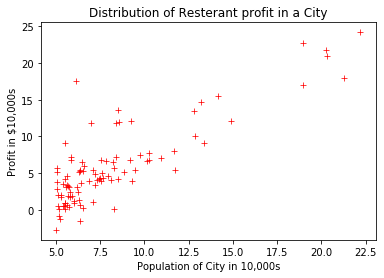

In [32]:
# Plot Data
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
ax = sns.scatterplot(X1,y,marker='+',color = 'red')
ax.set_ylabel('Profit in $10,000s')
ax.set_xlabel('Population of City in 10,000s')
ax.set_title('Distribution of Resterant profit in a City')

## Gradient descent

In [100]:
m = len(y)
X1 = np.hstack((np.ones((m,1)), X)) # Add a column of ones to x
theta = np.zeros(2) # initialize fitting parameters


### Compute cost (MSE)

In [78]:
def computeCost(X, y, theta):
    m = len(y)
    prediction = X.dot(theta) # Add hTheta function
    sqerror = np.power((prediction - y),2)
    J = 1/(2*m) * sum(sqerror)
    return J

In [87]:
# Some gradient descent settings
iterations = 1500
alpha = 0.01
J = computeCost(X1, y, theta)
print('With theta = [0 , 0]\nCost computed = ', round(J,3))
J = computeCost(X1, y, [-1,2])
print('With theta = [-1 , 2]\nCost computed = ', round(J,3))

With theta = [0 , 0]
Cost computed =  32.073
With theta = [-1 , 2]
Cost computed =  54.242


### Run Gradiant descent

In [96]:
def gradientDescent(X, y, theta, alpha, num_iters):
    '''GRADIENTDESCENT Performs gradient descent to learn theta
         theta = GRADIENTDESCENT(X, y, theta, alpha, num_iters) updates theta by 
        taking num_iters gradient steps with learning rate alpha
    '''
    # Initialize some useful values
    m = len(y) # number of training examples
    J_history = np.zeros(num_iters)

    for iter in range(num_iters):
        hTheta = X.dot(theta)
        for i in range(2):
            derive_J_Theta = 1/m * (X[:,i].dot(hTheta - y)) # we Derive J(Theta)
            theta[i] = theta[i] - alpha * derive_J_Theta #  assign every theta variable to decent gradient
      

        # Save the cost J in every iteration    
        J_history[iter] = computeCost(X, y, theta)
    return theta,J_history

In [101]:
# Run gradient descent
theta,J_history = gradientDescent(X1, y, theta, alpha, iterations)

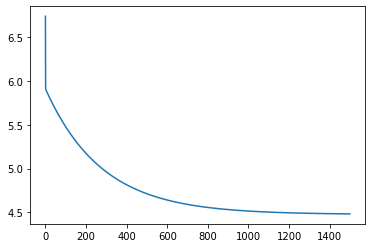

In [103]:
sns.lineplot(range(iterations),J_history)

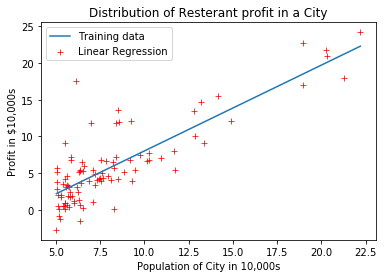

In [115]:
ax = sns.scatterplot(X1[:,1],y,marker='+',color = 'red')
sns.lineplot(X1[:,1], X1.dot(theta),ax=ax)
ax.set_ylabel('Profit in $10,000s')
ax.set_xlabel('Population of City in 10,000s')
ax.set_title('Distribution of Resterant profit in a City')
plt.legend(labels=['Training data', 'Linear Regression'])

## plot MSE values

In [164]:
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# initialize J_vals to a matrix of 0's
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# Fill out J_vals
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = np.array([theta0_vals[i], theta1_vals[j]])
        J_vals[i,j] = computeCost(X1, y, t)

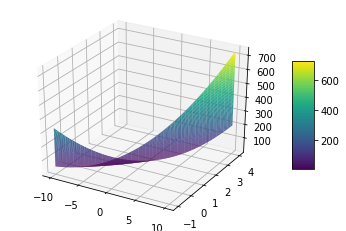

In [165]:

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
surf=ax.plot_surface(theta0_vals,theta1_vals , J_vals, cmap=plt.cm.viridis, linewidth=0.2)
fig.colorbar( surf, shrink=0.5, aspect=5)
plt.show()

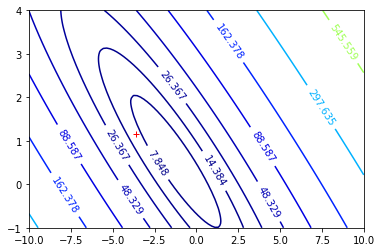

In [167]:
from matplotlib.colors import LogNorm
fig, ax = plt.subplots()
CS = ax.contour(theta0_vals,theta1_vals , J_vals,levels=np.logspace(-2, 3, 20),cmap=plt.cm.jet)
ax.clabel(CS, inline=1, fontsize=10)
ax.plot(theta[0],theta[1],marker='+',color='red')